In [1]:
#this code is written based on the idea and initial code written by my group mate the the University of Tartu Pedro Marco Melo Silva

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [39]:
excel_brent = pd.read_excel("D:/Viktor (personal)/la uni/Master degree/Estonia (University of Tartu)/Studies/3 sem/Macroeconometrics/project/weekly_crude_2.xls",
                           parse_dates=True)


excel_brent.head()

,observation_date,y
0,2012-01-06,111.96
1,2012-01-13,109.88
2,2012-01-20,108.50
3,2012-01-27,110.50
4,2012-02-03,112.56


In [40]:
df = excel_brent.copy()
df.set_index("observation_date", inplace = True)

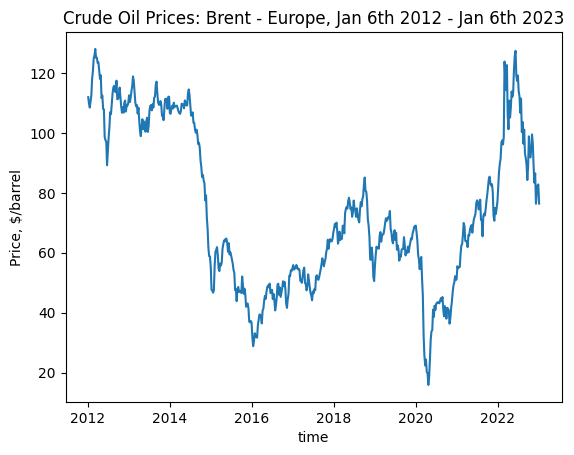

In [41]:
fig, ax = plt.subplots()
ax.plot(df)

ax.set(xlabel='time', ylabel='Price, $/barrel',
       title='Crude Oil Prices: Brent - Europe, Jan 6th 2012 - Jan 6th 2023')

# fig.savefig('brent_crude.png', dpi = 1080, transparent = True)
plt.show()


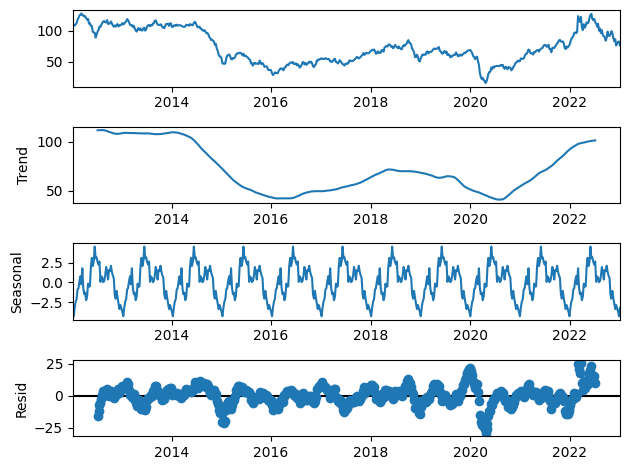

In [42]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(df, model='additive')
decom_plot = decomposition.plot();

# decom_plot.savefig('decom_plot.png', dpi = 1080, transparent = True)

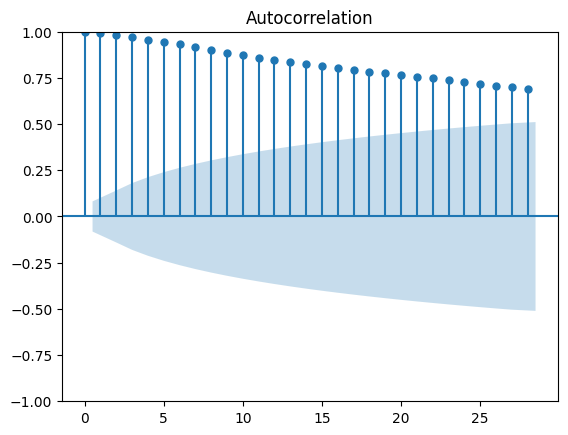

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf_plot = plot_acf(df);


In [14]:
# acf_plot.savefig('acf_1.png', dpi = 1080, transparent = True)

In [17]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.y)
print("p value: ", result[1])

p value:  0.2526249636256934


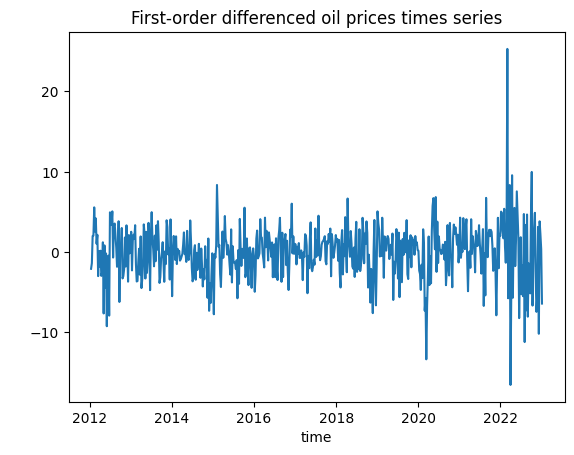

In [22]:
df['Oil Price First Difference'] = df['y'] - df['y'].shift(1)
# diff_plot = df['Oil Price First Difference'].plot();
fig, ax = plt.subplots()
ax.plot(df['Oil Price First Difference'])

ax.set(xlabel='time', ylabel=' ',
       title='First-order differenced oil prices times series')

# fig.savefig('diff_plot.png', dpi = 1080, transparent = True)
plt.show()


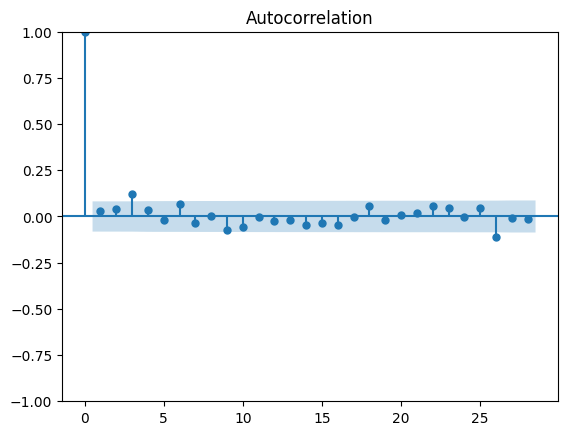

In [21]:
diff_acf_plot_1 = plot_acf(df.y.diff().dropna());
# diff_acf_plot_1.savefig('diff_acf_plot_1.png', dpi = 1080, transparent = True)

f:\python\Lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


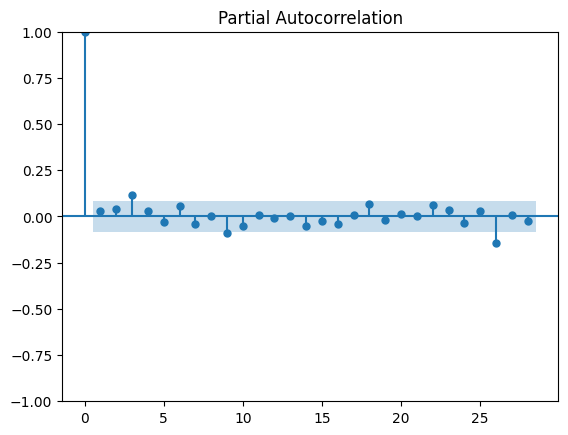

In [23]:
diff_pacf_plot_1 = plot_pacf(df.y.diff().dropna());
# diff_pacf_plot_1.savefig('diff_pacf_plot_1.png', dpi = 1080, transparent = True)

In [24]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.iloc[:, [1]].dropna())
print("p value: ", result[1])
# as we can see the first order differensing makes the data set stationary

p value:  1.3889907829004785e-21


In [25]:
df_train = df[:round(len(df)*0.95)]
df_test = df[round(len(df)*0.95):]

In [44]:
round(len(df)*0.95)

546

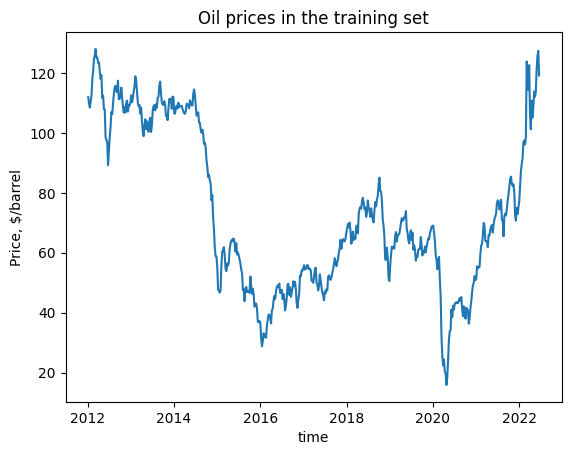

In [45]:
fig, ax = plt.subplots()
ax.plot(df_train.y)

ax.set(xlabel='time', ylabel='Price, $/barrel',
       title='Oil prices in the training set')

# fig.savefig('train_set_plot.png', dpi = 1080, transparent = True)

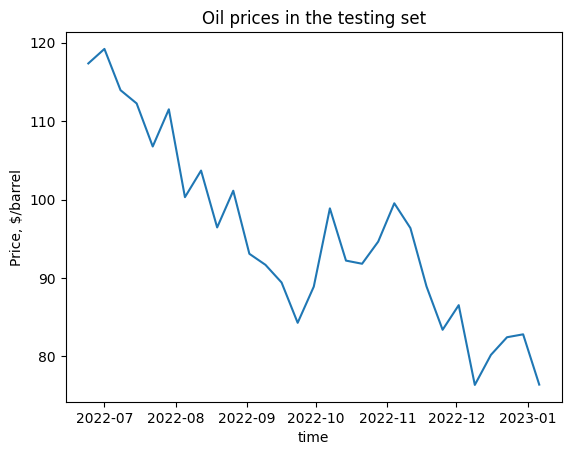

In [47]:
fig, ax = plt.subplots()
ax.plot(df_test.y)

ax.set(xlabel='time', ylabel='Price, $/barrel',
       title='Oil prices in the testing set')

# fig.savefig('test_set_plot.png', dpi = 1080, transparent = True)

In [48]:
from statsmodels.tsa.arima.model import ARIMA

arima_model_tr = ARIMA(df_train.y, order = (1,1,1))
model = arima_model_tr.fit()

print(model.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  546
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1401.060
Date:                Wed, 25 Jan 2023   AIC                           2808.119
Time:                        15:18:47   BIC                           2821.022
Sample:                    01-06-2012   HQIC                          2813.163
                         - 06-17-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7106      0.160      4.428      0.000       0.396       1.025
ma.L1         -0.6345      0.179     -3.546      0.000      -0.985      -0.284
sigma2        10.0100      0.272     36.863      0.0

f:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
f:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
f:\python\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [49]:
model_predict_test = model.forecast(len(df_test))

C:\Users\Viktor\AppData\Local\Temp\ipykernel_17940\2682215596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['forecast_manual'] = list(model_predict_test)


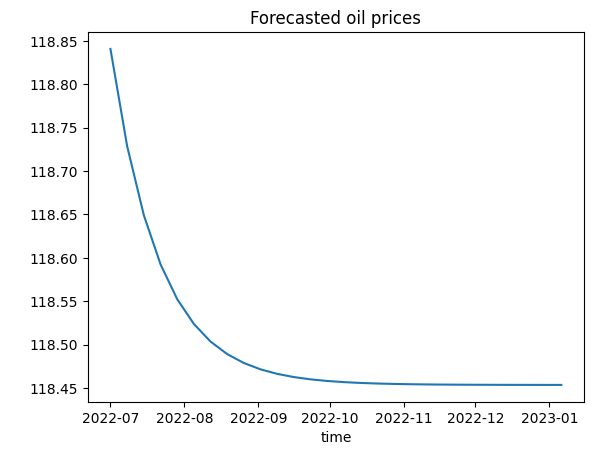

In [54]:
df_test['forecast_manual'] = list(model_predict_test)

fig, ax = plt.subplots()
ax.plot(df_test.forecast_manual[1:])

ax.set(xlabel='time', ylabel=' ',
       title='Forecasted oil prices')

# fig.savefig('forecast_111_plot.png', dpi = 1080, transparent = True)
plt.show()

C:\Users\Viktor\AppData\Local\Temp\ipykernel_2696\2850449549.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train["predict_manual"] = model_predict_train


<AxesSubplot: xlabel='observation_date'>

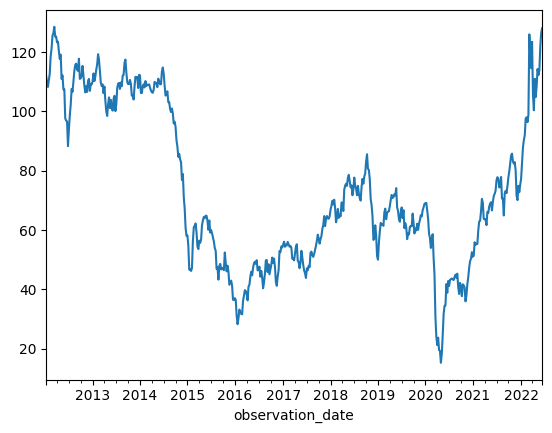

In [21]:
# model_predict_train = model.predict()

# df_train["predict_manual"] = model_predict_train
# df_train.predict_manual[1:].plot()

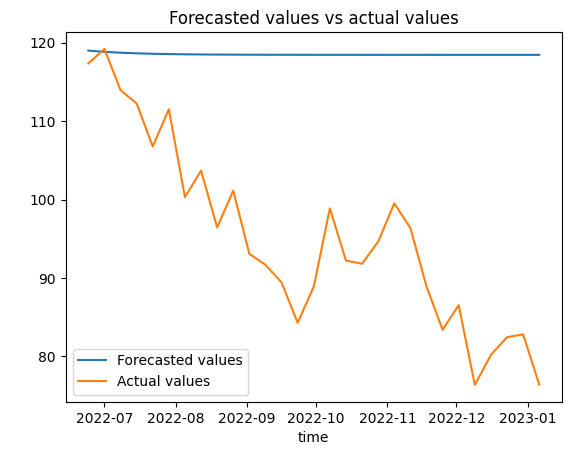

In [67]:
df_pred = pd.DataFrame(pd.concat([model_predict_test]))
df_pred['actual_val'] = df_test.iloc[:, [0]]
fig, ax = plt.subplots()
ax.plot(df_pred)

ax.set(xlabel='time', ylabel=' ',
       title='Forecasted values vs actual values')
ax.legend(['Forecasted values', 'Actual values'])

# fig.savefig('forecast_v_actual.png', dpi = 1080, transparent = True)
plt.show()

In [33]:
from pmdarima import auto_arima

auto_arima(df_train.y, trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2811.395, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2812.471, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2811.427, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2811.504, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2810.480, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2810.114, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2811.949, Time=0.36 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2811.880, Time=0.53 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2813.494, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2813.171, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2808.119, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2809.511, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2809.433, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2809.954, Time=0.18 sec
 ARIMA(1,1,2)(0,0,0)[0]          

ARIMA(order=(1, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

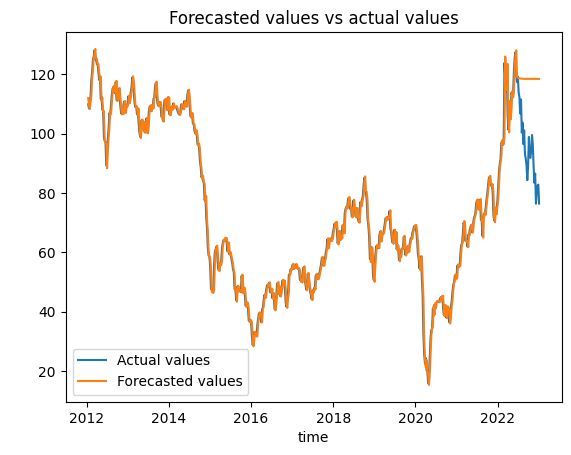

In [69]:
df_pred_full = pd.DataFrame(pd.concat([df.y, pd.concat([model.predict(), model_predict_test])], axis = 1))

fig, ax = plt.subplots()
ax.plot(df_pred_full[1:])

ax.set(xlabel='time', ylabel=' ',
       title='Forecasted values vs actual values')
ax.legend(['Actual values', 'Forecasted values'])

fig.savefig('forecast_v_actual_full.png', dpi = 1080, transparent = True)
plt.show()

In [68]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse=sqrt(mean_squared_error(df_pred.predicted_mean,df_pred.actual_val))

rmse

26.07704929747839